In [2]:
movie_path = "./ml-latest-small/movies.csv"
rating_path = "./ml-latest-small/ratings.csv"
import pandas as pd
from pandas import DataFrame as movies_df
from pandas import DataFrame as ratings_df

movies_df = pd.read_csv(movie_path,',')
ratings_df = pd.read_csv(rating_path,',')

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
len(movies_df.index)

9742

In [5]:
len(ratings_df.index)

100836

In [6]:
# to access 
print(movies_df.iloc[0][0])
print(movies_df.iloc[0][1])
print(movies_df.iloc[0][2])

1
Toy Story (1995)
Adventure|Animation|Children|Comedy|Fantasy


In [7]:
# the genres are pipe-character separated and it makes it hard for us find genre distribution

# lets add a new column called 'genres_arr' which has the genres represented as an array
movies_df["genres_arr"] = movies_df["genres"].str.split("|")

# now lets look at our dataframe to see the new column we added
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [8]:
filter = movies_df.apply(lambda row: "Animation" in row["genres_arr"], axis="columns" )

In [9]:
animation_df = movies_df[filter]

In [10]:
len(animation_df)

611

In [11]:
animation_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
12,13,Balto (1995),Adventure|Animation|Children,"[Adventure, Animation, Children]"
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,"[Animation, Children, Drama, Musical, Romance]"
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance,"[Animation, Children, Comedy, Romance]"
272,313,"Swan Princess, The (1994)",Animation|Children,"[Animation, Children]"


In [12]:
genre_counter_temp = {}
print(movies_df.index)

RangeIndex(start=0, stop=9742, step=1)


In [13]:
for index,row in movies_df.iterrows():
    for genre in row['genres_arr']:
        genre_counter_temp[genre] = genre_counter_temp.get(genre, 0) + 1

print(genre_counter_temp)


{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


In [14]:
# how to print all the keys and their corresponding values 
genre_counter_temp.items()

dict_items([('Adventure', 1263), ('Animation', 611), ('Children', 664), ('Comedy', 3756), ('Fantasy', 779), ('Romance', 1596), ('Drama', 4361), ('Action', 1828), ('Crime', 1199), ('Thriller', 1894), ('Horror', 978), ('Mystery', 573), ('Sci-Fi', 980), ('War', 382), ('Musical', 334), ('Documentary', 440), ('IMAX', 158), ('Western', 167), ('Film-Noir', 87), ('(no genres listed)', 34)])

In [15]:

genre_counter = genre_counter_temp
print(genre_counter)

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


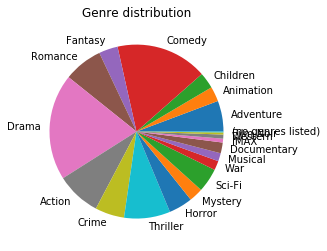

In [16]:
# now let's plot the genres distribution as a bar chart and visualize it

# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

# now lets plot this genre distribution as a pie chart
plt.pie(genre_counter.values(), labels=genre_counter.keys())
plt.title('Genre distribution')
plt.show()

In [17]:
# we can also plot a bar chart (with grid lines and slanted x axis labels for better readability)
x = list(range(len(genre_counter)))
print(x)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[]

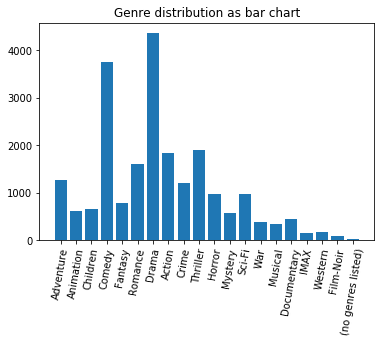

In [18]:
plt.xticks(x, genre_counter.keys(), rotation=80)
plt.bar(x, genre_counter.values())
plt.title('Genre distribution as bar chart')
plt.plot()

In [19]:
# Lets find masala movies to watch, as we all love masala :)
# Real masala movies has Action and Romance and Comedy and Thriller :)> Changed to sci-fi 
scifi_genres = ['Sci-Fi','Action']
scifi_lambda = lambda x: set(scifi_genres).issubset(x['genres_arr'])
scifi_movies = movies_df[movies_df.apply(scifi_lambda, axis='columns')]
scifi_movies

,movieId,title,genres,genres_arr
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,"[Action, Sci-Fi, Thriller]"
68,76,Screamers (1995),Action|Sci-Fi|Thriller,"[Action, Sci-Fi, Thriller]"
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,"[Action, Adventure, Mystery, Sci-Fi]"
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,"[Action, Sci-Fi, Thriller]"
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,"[Action, Crime, Sci-Fi]"
167,198,Strange Days (1995),Action|Crime|Drama|Mystery|Sci-Fi|Thriller,"[Action, Crime, Drama, Mystery, Sci-Fi, Thriller]"
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,"[Action, Adventure, Sci-Fi]"
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,"[Action, Adventure, Sci-Fi]"
253,292,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,"[Action, Drama, Sci-Fi, Thriller]"
275,316,Stargate (1994),Action|Adventure|Sci-Fi,"[Action, Adventure, Sci-Fi]"


In [20]:
# lets find out all values ratings users can give to movies
unique_ratings = ratings_df['rating'].unique()
unique_ratings.sort()
print(unique_ratings)

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [25]:
# now lets find out number of ratings and number of users who have given those ratings

print('#ratings %d' % len(ratings_df.index))
print('#users %d' % len(ratings_df['userId'].unique()))

#ratings 100836
#users 610


In [32]:
import numpy as np
print("min: %.1f" % np.min(ratings_df.rating))
print("max: %.1f" % np.max(ratings_df.rating))
print("moy: %.1f" % np.average(ratings_df.rating))
print("med: %.1f" % np.median(ratings_df.rating))
#np.percentile?
print("perc 25: %.1f" % np.percentile(ratings_df.rating,25))
print("perc 75: %.1f" % np.percentile(ratings_df.rating,75))

min: 0.5
max: 5.0
moy: 3.5
med: 3.5
perc 25: 3.0
perc 75: 4.0


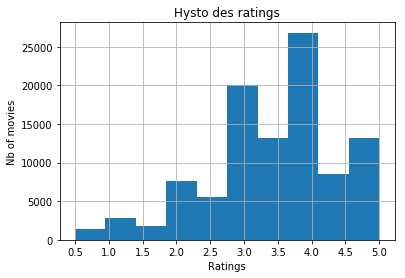

In [37]:
#traver de l'hystogramme
plt.hist(ratings_df.rating)
plt.xticks(ratings_df['rating'].unique())
plt.title("Hysto des ratings")
plt.xlabel("Ratings")
plt.ylabel("Nb of movies")
plt.grid()
plt.show()

In [38]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [40]:
ratings_view = ratings_df[["movieId", "rating"]]
ratings_view.head()

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0


In [41]:
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
4245,6201,5.0
8136,102217,5.0
8130,102084,5.0
4240,6192,5.0
9104,145994,5.0


In [42]:
# but which movies are these, we want their names as well

# now lets merge/join the movies_df and ratings_df so that we can see the actual movie titles of top 10 movies
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"


In [48]:
# create a dataframe with just movieId and rating attributes
ratings_view = merged_df[['movieId', 'rating', 'title']]
ratings_view.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),5.0
8089,100556,"Act of Killing, The (2012)",5.0
9065,143031,Jump In! (2007),5.0
9076,143511,Human (2015),5.0
9078,143559,L.A. Slasher (2015),5.0
4245,6201,Lady Jane (1986),5.0
8136,102217,Bill Hicks: Revelations (1993),5.0
8130,102084,Justice League: Doom (2012),5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
9104,145994,Formula of Love (1984),5.0


In [50]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
temp_df = ratings_view.groupby(['movieId', 'title'], as_index=False).count()
temp_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
314,356,Forrest Gump (1994),329
277,318,"Shawshank Redemption, The (1994)",317
257,296,Pulp Fiction (1994),307
510,593,"Silence of the Lambs, The (1991)",279
1938,2571,"Matrix, The (1999)",278
224,260,Star Wars: Episode IV - A New Hope (1977),251
418,480,Jurassic Park (1993),238
97,110,Braveheart (1995),237
507,589,Terminator 2: Judgment Day (1991),224
461,527,Schindler's List (1993),220


In [51]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
well_rated_df = temp_df[temp_df.apply(lambda x: x['rating'] > 100, axis='columns')]

well_rated_df.head()

,movieId,title,rating
0,1,Toy Story (1995),215
1,2,Jumanji (1995),110
5,6,Heat (1995),102
9,10,GoldenEye (1995),132
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),177


In [52]:
final_df = pd.merge(merged_df, well_rated_df, how='inner', on=['movieId'])
final_df.head()

,userId,movieId,rating_x,timestamp,title_x,genres,genres_arr,title_y,rating_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215


In [53]:
ratings_view = final_df[['movieId', 'rating_x', 'title_x']]
x = ratings_view.groupby(['movieId', 'title_x'], as_index=False).mean().sort_values(by='rating_x', ascending=False)
x.head(10)

,movieId,title_x,rating_x
25,318,"Shawshank Redemption, The (1994)",4.429022
58,858,"Godfather, The (1972)",4.289062
101,2959,Fight Club (1999),4.272936
75,1221,"Godfather: Part II, The (1974)",4.259690
129,48516,"Departed, The (2006)",4.252336
73,1213,Goodfellas (1990),4.250000
130,58559,"Dark Knight, The (2008)",4.238255
8,50,"Usual Suspects, The (1995)",4.237745
67,1197,"Princess Bride, The (1987)",4.232394
20,260,Star Wars: Episode IV - A New Hope (1977),4.231076


In [ ]:
pd.merge?